# Distances and intersections

Based on http://paulbourke.net/geometry/pointlineplane/

In [31]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

## Distance point to segment

In [56]:
def project(p, s1, s2, in_segment=True):
    x1, y1 = s1
    x2, y2 = s2
    x3, y3 = p
    n2 = (x2 - x1)**2 + (y2 - y1)**2
    u = ((x3 - x1) * (x2 - x1) + (y3 - y1) * (y2 - y1)) / n2
    if in_segment:
        if u < 0:
            u = 0
        elif u > 1:
            u = 1
    x = x1 + u * (x2 - x1)
    y = y1 + u * (y2 - y1)
    d = sqrt((x3 - x)**2 + (y3 - y)**2)
    return d, (x, y), u

In [60]:
cases1 = [
    ((1,1), ((2,2),(4,2))),
    ((2,1), ((2,2),(4,2)))
]

1.4142135623730951 (2, 2)
1.0 (2.0, 2.0)


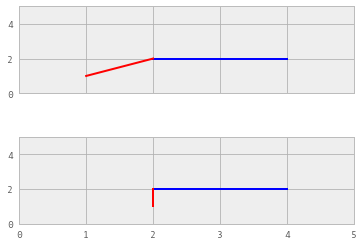

In [61]:
fig, ax = plt.subplots(nrows=len(cases1), ncols=1, sharex=True)
for idx, (f, (t1,t2)) in enumerate(cases1):
    line = Line2D((t1[0], t2[0]), (t1[1], t2[1]), linewidth=2, linestyle='solid', color="blue")
    ax[idx].add_line(line)
    d, p, _ = project(f, t1, t2)
    print(d, p)
    line = Line2D((f[0], p[0]), (f[1], p[1]), linewidth=2, linestyle='solid', color="red")
    ax[idx].add_line(line)
    ax[idx].set_xlim((0,5))
    ax[idx].set_ylim((0,5))

## Distance segment to segment

In [91]:
cases2 = [
    (((1,1),(3,1)), ((2,2),(4,2))),
    (((3,1),(1,1)), ((2,2),(4,2))),
    (((2,1),(4,3)), ((2,2),(4,2))),
    (((1,1),(3,4)), ((2,2),(4,2))),
    (((1,1),(2,1)), ((3,2),(4,2))),
    (((3,1),(4,1)), ((1,2),(2,2))),
    (((3,1),(4,1)), ((2,2),(1,2)))
]

In [105]:
def intersection(f1, f2, t1, t2):
    print(f"f1={f1}")
    print(f"f2={f2}")
    print(f"t1={t1}")
    print(f"t2={t2}")
    x1, y1 = f1
    x2, y2 = f2
    x3, y3 = t1
    x4, y4 = t2
    n = ((y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1))
    if np.allclose([n], [0]):
        # parallel
        is_parallel = True
        n = 0.0001 # TODO: simulates a point far away
    else:
        is_parallel = False
    u_f = ((x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)) / n
    u_t = ((x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)) / n
    print(f"u_f = {u_f}, u_t = {u_t}")
    xi = x1 + u_f * (x2 - x1)
    yi = y1 + u_f * (y2 - y1)
    changed_f = False
    changed_t = False
    if u_t > 1:
        u_t = 1
        changed_t = True
    elif u_t < 0:
        u_t = 0
        changed_t = True
    if u_f > 1:
        u_f = 1
        changed_f = True
    elif u_f < 0:
        u_f = 0
        changed_f = True
    if not changed_t and not changed_f:
        return 0, (xi, yi), (xi, yi), u_t
    xf = x1 + u_f * (x2 - x1)
    yf = y1 + u_f * (y2 - y1)
    xt = x3 + u_t * (x4 - x3)
    yt = y3 + u_t * (y4 - y3)
    if changed_t and changed_f:
        # Compare furthest point from intersection with segment
        df = (xf - xi)**2 + (yf - yi)**2
        dt = (xt - xi)**2 + (yt - yi)**2
        if df > dt:
            changed_t = False
        else:
            changed_f = False
    if changed_t:
        pt = (xt, yt)
        d, pf, u_f = project(pt, f1, f2)
    elif changed_f:
        pf = (xf, yf)
        d, pt, u_t = project(pf, t1, t2)
    return d, pf, pt, u_t

u_f = -20000.0, u_t = -20000.0
1.0 (2.0, 1.0) (2, 2)
u_f = -20000.0, u_t = 20000.0
1.0 (3, 1) (3.0, 2.0)
u_f = 0.5, u_t = 0.5
0 (3.0, 2.0) (3.0, 2.0)
u_f = 0.3333333333333333, u_t = -0.16666666666666666
0.2773500981126148 (1.7692307692307692, 2.153846153846154) (2, 2)
u_f = -10000.0, u_t = -10000.0
1.4142135623730951 (2, 1) (3, 2)
u_f = -10000.0, u_t = -10000.0
1.4142135623730951 (3, 1) (2, 2)
u_f = 10000.0, u_t = -10000.0
1.4142135623730951 (3, 1) (2, 2)
u_f = -7.85892239925628, u_t = -7.85892239925628
0.09508997454757735 (1.0373884386783012, 0.34887803346186874) (0.9510565162951535, 0.3090169943749474)


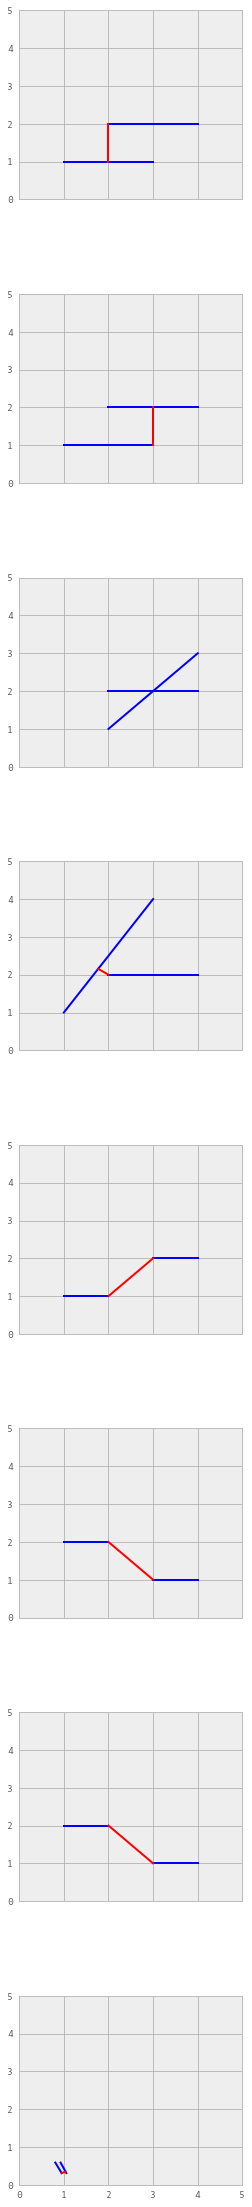

In [94]:
fig, ax = plt.subplots(nrows=len(cases2), ncols=1, sharex=True, figsize=(4, len(cases2)*5))
for idx, ((f1,f2), (t1,t2)) in enumerate(cases2):
    for p1,p2 in [(f1,f2), (t1, t2)]:
        line = Line2D((p1[0], p2[0]), (p1[1], p2[1]), linewidth=2, linestyle='solid', color='blue')
        ax[idx].add_line(line)
    d, pf, pt, ut = intersection(f1, f2, t1, t2)
    print(d, pf, pt)
    line = Line2D((pf[0], pt[0]), (pf[1], pt[1]), linewidth=2, linestyle='solid', color='red')
    ax[idx].add_line(line)
    ax[idx].set_xlim((0,5))
    ax[idx].set_ylim((0,5))

f1=(0.9510565162951535, 0.3090169943749474)
f2=(0.8090169943749475, 0.5877852522924731)
t1=(1.05579301479833, 0.3090169943749474)
t2=(0.9270805742745618, 0.5877852522924731)
u_f = -7.85892239925628, u_t = -7.85892239925628
0.09508997454757735 (0.9510565162951535, 0.3090169943749474) (1.0373884386783012, 0.34887803346186874)


(0, 0.75)

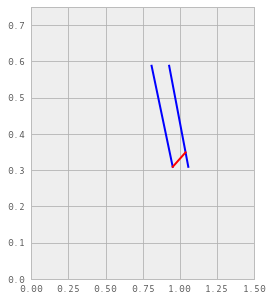

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(4, 5))
((f1,f2), (t1,t2)) = (((1.05579301479833, 0.3090169943749474),(0.9270805742745618, 0.5877852522924731)),((0.9510565162951535, 0.3090169943749474), (0.8090169943749475, 0.5877852522924731)))
f1,f2, t1,t2 = t1,t2,f1,f2
for p1,p2 in [(f1,f2), (t1, t2)]:
    line = Line2D((p1[0], p2[0]), (p1[1], p2[1]), linewidth=2, linestyle='solid', color='blue')
    ax.add_line(line)
d, pf, pt, ut = intersection(f1, f2, t1, t2)
print(d, pf, pt)
line = Line2D((pf[0], pt[0]), (pf[1], pt[1]), linewidth=2, linestyle='solid', color='red')
ax.add_line(line)
ax.set_xlim((0,1.5))
ax.set_ylim((0,.75))